# **IMPORT LIBRARY**

In [1]:
import os
import sys
import time
import math
import glob
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError, RootMeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dataset

In [2]:
df21 = pd.read_csv("SPKU Tahun 2021.csv")
df21.head()

,periode_data,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,202101,2021-01-22,DKI5 (Kebon Jeruk) Jakarta Barat,45,NaN,21,13,40,15,45,PM10,BAIK
1,202101,2021-01-23,DKI5 (Kebon Jeruk) Jakarta Barat,80,NaN,22,44,44,22,80,PM10,SEDANG
2,202101,2021-01-24,DKI5 (Kebon Jeruk) Jakarta Barat,27,NaN,14,9,29,---,29,CO,BAIK
3,202101,2021-01-25,DKI5 (Kebon Jeruk) Jakarta Barat,55,NaN,19,29,67,13,67,CO,SEDANG
4,202101,2021-01-26,DKI5 (Kebon Jeruk) Jakarta Barat,57,NaN,21,23,36,16,57,PM10,SEDANG


In [3]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  1825 non-null   int64 
 1   tanggal       1825 non-null   object
 2   stasiun       1825 non-null   object
 3   pm10          1825 non-null   object
 4   pm25          1763 non-null   object
 5   so2           1825 non-null   object
 6   co            1825 non-null   object
 7   o3            1825 non-null   object
 8   no2           1825 non-null   object
 9   max           1825 non-null   object
 10  critical      1809 non-null   object
 11  categori      1824 non-null   object
dtypes: int64(1), object(11)
memory usage: 171.2+ KB


In [4]:
df22 = pd.read_csv("SPKU Tahun 2022.csv")
df22.head()

,periode_data,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,202212,2022-12-31,DKI4,54,73,56,24,23,24,73,"PM2,5",SEDANG
1,202212,2022-12-30,DKI4,40,64,57,21,17,24,64,"PM2,5",SEDANG
2,202207,2022-07-06,DKI4,75,129,45,25,71,26,129,"PM2,5",TIDAK SEHAT
3,202207,2022-07-05,DKI4,66,110,47,16,61,23,110,"PM2,5",TIDAK SEHAT
4,202207,2022-07-04,DKI4,56,78,49,11,60,13,78,"PM2,5",SEDANG


In [5]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  365 non-null    int64 
 1   tanggal       365 non-null    object
 2   stasiun       365 non-null    object
 3   pm10          365 non-null    int64 
 4   pm25          365 non-null    int64 
 5   so2           365 non-null    int64 
 6   co            365 non-null    int64 
 7   o3            365 non-null    int64 
 8   no2           365 non-null    int64 
 9   max           365 non-null    int64 
 10  critical      364 non-null    object
 11  categori      365 non-null    object
dtypes: int64(8), object(4)
memory usage: 34.3+ KB


In [6]:
df23 = pd.read_csv("SPKU Tahun 2023.csv")
df23.head()

,periode_data,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,202302,2023-02-25,DKI5 Kebon Jeruk Jakarta Barat,35,-,13,12,31,18,35,PM10,BAIK
1,202302,2023-02-26,DKI5 Kebon Jeruk Jakarta Barat,23,-,14,9,32,11,32,O3,BAIK
2,202302,2023-02-27,DKI5 Kebon Jeruk Jakarta Barat,20,-,13,8,33,13,33,O3,BAIK
3,202302,2023-02-28,DKI5 Kebon Jeruk Jakarta Barat,30,-,21,11,28,18,30,PM10,BAIK
4,202303,2023-03-01,DKI1 Bunderan HI,38,44,50,8,19,27,50,3,BAIK


In [7]:
df24 = pd.read_csv("SPKU Tahun 2024.csv")
df24.head()

,periode_data,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,202401,2024-01-21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,NaN,SEDANG
1,202401,2024-01-22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0,NaN,SEDANG
2,202401,2024-01-23,DKI3 Jagakarsa,NaN,52.0,46.0,6.0,9.0,51.0,52.0,PM25,SEDANG
3,202401,2024-01-24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG
4,202401,2024-01-25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG


In [8]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   periode_data  910 non-null    int64  
 1   tanggal       910 non-null    object 
 2   stasiun       910 non-null    object 
 3   pm10          896 non-null    float64
 4   pm25          902 non-null    float64
 5   so2           904 non-null    float64
 6   co            900 non-null    float64
 7   o3            905 non-null    float64
 8   no2           894 non-null    float64
 9   max           906 non-null    float64
 10  critical      886 non-null    object 
 11  categori      910 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 85.4+ KB


# **DATA UNDERSTANDING**

In [9]:
# Import Data dan Pembuatan data Frame
joined_files = os.path.join("Dataset ISPU", "*.csv")

joined_list = glob.glob(joined_files)
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [10]:
# Pemahaman informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  4925 non-null   int64 
 1   tanggal       4925 non-null   object
 2   stasiun       4925 non-null   object
 3   pm10          4911 non-null   object
 4   pm25          4855 non-null   object
 5   so2           4919 non-null   object
 6   co            4915 non-null   object
 7   o3            4920 non-null   object
 8   no2           4909 non-null   object
 9   max           4921 non-null   object
 10  critical      4876 non-null   object
 11  categori      4924 non-null   object
dtypes: int64(1), object(11)
memory usage: 461.8+ KB


In [11]:
df.head()

,periode_data,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,202101,2021-01-22,DKI5 (Kebon Jeruk) Jakarta Barat,45,NaN,21,13,40,15,45,PM10,BAIK
1,202101,2021-01-23,DKI5 (Kebon Jeruk) Jakarta Barat,80,NaN,22,44,44,22,80,PM10,SEDANG
2,202101,2021-01-24,DKI5 (Kebon Jeruk) Jakarta Barat,27,NaN,14,9,29,---,29,CO,BAIK
3,202101,2021-01-25,DKI5 (Kebon Jeruk) Jakarta Barat,55,NaN,19,29,67,13,67,CO,SEDANG
4,202101,2021-01-26,DKI5 (Kebon Jeruk) Jakarta Barat,57,NaN,21,23,36,16,57,PM10,SEDANG


# **DATA PREPROCESSING**

**Menghilangkan data yang tidak diperlukan**

In [12]:
df = df.drop(['periode_data', 'critical', 'max', 'categori'], axis=1)

**Memeriksa Missing Value**

In [13]:
df = df.replace(['---'], np.NaN)
df = df.replace(['-'], np.NaN)
df = df.replace([' '], np.NaN)

In [14]:
df.fillna(value=np.nan)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2
0,2021-01-22,DKI5 (Kebon Jeruk) Jakarta Barat,45,NaN,21,13,40,15
1,2021-01-23,DKI5 (Kebon Jeruk) Jakarta Barat,80,NaN,22,44,44,22
2,2021-01-24,DKI5 (Kebon Jeruk) Jakarta Barat,27,NaN,14,9,29,NaN
3,2021-01-25,DKI5 (Kebon Jeruk) Jakarta Barat,55,NaN,19,29,67,13
4,2021-01-26,DKI5 (Kebon Jeruk) Jakarta Barat,57,NaN,21,23,36,16
...,...,...,...,...,...,...,...,...
4920,2022-07-11,DKI4,66,112,47,15,84,29
4921,2022-07-10,DKI4,63,93,47,13,84,19
4922,2022-07-09,DKI2,61,93,48,13,107,25
4923,2022-07-08,DKI2,55,80,48,17,95,25


**Mengubah Tipe Data**

In [15]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df["pm10"] = df["pm10"].astype("float")
df["pm25"] = df["pm25"].astype("float")
df["so2"] = df["so2"].astype("float")
df["co"] = df["co"].astype("float")
df["o3"] = df["o3"].astype("float")
df["no2"] = df["no2"].astype("float")

In [16]:
df.dtypes

,0
tanggal,datetime64[ns]
stasiun,object
pm10,float64
pm25,float64
so2,float64
co,float64
o3,float64
no2,float64


**MENGATASI MISSING VALUE**

In [17]:
df.isnull().sum()

,0
tanggal,0
stasiun,0
pm10,304
pm25,403
so2,159
co,90
o3,102
no2,117


**Fill Missing Value dengan interpolasi**

In [18]:
df= df.interpolate(method='linear')

<ipython-input-18-1a96a489f374>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df= df.interpolate(method='linear')


In [19]:
df['pm25'].bfill(inplace = True)

<ipython-input-19-06615e5dc7eb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm25'].bfill(inplace = True)


In [20]:
df.isnull().sum()

,0
tanggal,0
stasiun,0
pm10,0
pm25,0
so2,0
co,0
o3,0
no2,0


**Mengatasi Inkonsisten data**

In [23]:
for i in range(df['stasiun'].size):
    if "DKI1" in df['stasiun'].values[i]:
      df.at[i, "stasiun"] = 'DKI1 Bunderan HI'
    if "DKI2" in df['stasiun'].values[i]:
      df.at[i, "stasiun"] = 'DKI2 Kelapa Gading'
    if "DKI3" in df['stasiun'].values[i]:
      df.at[i, "stasiun"] = 'DKI3 Jagakarsa'
    if "DKI4" in df['stasiun'].values[i]:
      df.at[i, "stasiun"] = 'DKI4 Lubang Buaya'
    if "DKI5" in df['stasiun'].values[i]:
      df.at[i, "stasiun"] = 'DKI5 Kebon Jeruk'

# **MEMISAHKAN DAN MENYIMPAN DATA BERDASARKAN STASIUN**

In [24]:
grouped = df.groupby('stasiun')

In [25]:
output_dir = 'Dataset_Stasiun'
os.makedirs(output_dir, exist_ok=True)

# Menyimpan setiap dataframe terpisah ke file CSV
for category, data in grouped:
    file_name = f'{output_dir}/df_{category}.csv'
    data.to_csv(file_name, index=False)
    print(f"File CSV untuk kategori {category} disimpan sebagai {file_name}")

File CSV untuk kategori DKI1 Bunderan HI disimpan sebagai Dataset_Stasiun/df_DKI1 Bunderan HI.csv
File CSV untuk kategori DKI2 Kelapa Gading disimpan sebagai Dataset_Stasiun/df_DKI2 Kelapa Gading.csv
File CSV untuk kategori DKI3 Jagakarsa disimpan sebagai Dataset_Stasiun/df_DKI3 Jagakarsa.csv
File CSV untuk kategori DKI4 Lubang Buaya disimpan sebagai Dataset_Stasiun/df_DKI4 Lubang Buaya.csv
File CSV untuk kategori DKI5 Kebon Jeruk disimpan sebagai Dataset_Stasiun/df_DKI5 Kebon Jeruk.csv


# IMPORT DATAFRAME

In [27]:
df1 = pd.read_csv("Dataset_Stasiun/df_DKI1 Bunderan HI.csv")
df1['tanggal']= pd.to_datetime(df1['tanggal'])
df1.set_index(['tanggal'], inplace=True)
df1.head()

,stasiun,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,,
2021-02-01,DKI1 Bunderan HI,59.0,79.0,21.0,26.0,15.0,31.0
2021-02-02,DKI1 Bunderan HI,30.0,46.0,21.0,14.0,16.0,24.0
2021-02-03,DKI1 Bunderan HI,23.0,33.0,19.0,11.0,14.0,19.0
2021-02-04,DKI1 Bunderan HI,36.0,53.0,23.0,14.0,12.0,24.0
2021-02-05,DKI1 Bunderan HI,29.0,36.0,20.0,14.0,12.0,21.0


In [28]:
df2 = pd.read_csv("Dataset_Stasiun/df_DKI2 Kelapa Gading.csv")
df2['tanggal']= pd.to_datetime(df2['tanggal'])
df2.set_index(['tanggal'], inplace=True)
df2.head()

,stasiun,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,,
2021-02-01,DKI2 Kelapa Gading,64.0,87.0,38.0,16.0,46.0,25.0
2021-02-02,DKI2 Kelapa Gading,30.0,42.0,38.0,4.0,55.0,15.0
2021-02-03,DKI2 Kelapa Gading,24.0,35.0,38.0,4.0,42.0,15.0
2021-02-04,DKI2 Kelapa Gading,33.0,50.0,39.0,7.0,47.0,15.0
2021-02-05,DKI2 Kelapa Gading,25.0,35.0,39.0,5.0,45.0,13.0


In [29]:
df3 = pd.read_csv("Dataset_Stasiun/df_DKI3 Jagakarsa.csv")
df3['tanggal']= pd.to_datetime(df3['tanggal'])
df3.set_index(['tanggal'], inplace=True)
df3.head()

,stasiun,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,,
2021-02-01,DKI3 Jagakarsa,73.0,110.0,28.0,18.0,26.0,18.0
2021-02-02,DKI3 Jagakarsa,53.0,70.0,25.0,10.0,27.0,14.0
2021-02-03,DKI3 Jagakarsa,32.0,53.0,27.0,6.0,24.0,9.0
2021-02-04,DKI3 Jagakarsa,29.0,54.0,26.0,11.0,24.0,13.0
2021-02-05,DKI3 Jagakarsa,27.0,51.0,24.0,10.0,24.0,12.0


In [30]:
df4 = pd.read_csv("Dataset_Stasiun/df_DKI4 Lubang Buaya.csv")
df4['tanggal']= pd.to_datetime(df4['tanggal'])
df4.set_index(['tanggal'], inplace=True)
df4.head()

,stasiun,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,,
2021-02-01,DKI4 Lubang Buaya,50.5,76.500000,32.5,13.5,24.5,13.5
2021-02-02,DKI4 Lubang Buaya,37.0,59.000000,40.0,14.0,22.0,12.0
2021-01-01,DKI4 Lubang Buaya,41.0,14.698113,37.0,14.0,35.0,4.0
2021-01-02,DKI4 Lubang Buaya,44.0,16.396226,38.0,38.0,59.0,3.0
2021-01-03,DKI4 Lubang Buaya,50.0,18.094340,37.0,16.0,52.0,5.0


In [31]:
df5 = pd.read_csv("Dataset_Stasiun/df_DKI5 Kebon Jeruk.csv")
df5['tanggal']= pd.to_datetime(df5['tanggal'])
df5.set_index(['tanggal'], inplace=True)
df5.head()

,stasiun,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,,
2021-01-22,DKI5 Kebon Jeruk,45.0,79.0,21.0,13.0,40.0,15.0
2021-01-23,DKI5 Kebon Jeruk,80.0,79.0,22.0,44.0,44.0,22.0
2021-01-24,DKI5 Kebon Jeruk,27.0,79.0,14.0,9.0,29.0,17.5
2021-01-25,DKI5 Kebon Jeruk,55.0,79.0,19.0,29.0,67.0,13.0
2021-01-26,DKI5 Kebon Jeruk,57.0,79.0,21.0,23.0,36.0,16.0


# NORMALISASI

In [32]:
polutan_column = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']
#Normalisasi
scaler= MinMaxScaler(feature_range=(0, 1))

In [33]:
df1[polutan_column] = scaler.fit_transform(df1[polutan_column])
df1 = df1[polutan_column]
df1

,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,
2021-02-01,0.666667,0.594340,0.116505,0.575,0.189655,0.369863
2021-02-02,0.183333,0.283019,0.116505,0.275,0.206897,0.273973
2021-02-03,0.066667,0.160377,0.097087,0.200,0.172414,0.205479
2021-02-04,0.283333,0.349057,0.135922,0.275,0.137931,0.273973
2021-02-05,0.166667,0.188679,0.106796,0.275,0.137931,0.232877
...,...,...,...,...,...,...
2023-11-30,0.316667,0.481132,0.330097,0.225,0.517241,0.410959
2022-09-13,0.666667,0.613208,0.417476,0.375,0.706897,0.383562
2022-10-18,0.666667,0.594340,0.398058,0.325,0.706897,0.424658


In [34]:
df2[polutan_column] = scaler.fit_transform(df2[polutan_column])
df2 = df2[polutan_column]
df2

,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,
2021-02-01,0.605263,0.607477,0.4500,0.250000,0.210526,0.2500
2021-02-02,0.157895,0.186916,0.4500,0.019231,0.263158,0.1250
2021-02-03,0.078947,0.121495,0.4500,0.019231,0.187135,0.1250
2021-02-04,0.197368,0.261682,0.4625,0.076923,0.216374,0.1250
2021-02-05,0.092105,0.121495,0.4625,0.038462,0.204678,0.1000
...,...,...,...,...,...,...
2022-07-25,0.500000,0.607477,0.5500,0.250000,0.473684,0.2375
2022-07-24,0.473684,0.560748,0.5625,0.211538,0.491228,0.2000
2022-07-21,0.750000,0.822430,0.6000,0.230769,0.608187,0.2875


In [35]:
df3[polutan_column] = scaler.fit_transform(df3[polutan_column])
df3 = df3[polutan_column]
df3

,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,
2021-02-01,0.769231,0.763359,0.256098,0.246377,0.155405,0.089109
2021-02-02,0.549451,0.458015,0.219512,0.130435,0.162162,0.069307
2021-02-03,0.318681,0.328244,0.243902,0.072464,0.141892,0.044554
2021-02-04,0.285714,0.335878,0.231707,0.144928,0.141892,0.064356
2021-02-05,0.263736,0.312977,0.207317,0.130435,0.141892,0.059406
...,...,...,...,...,...,...
2022-02-04,0.560440,0.473282,0.475610,0.159420,0.439189,0.133663
2022-03-22,0.516484,0.404580,0.378049,0.159420,0.216216,0.084158
2022-05-12,0.637363,0.572519,0.573171,0.173913,0.405405,0.123762


In [36]:
df4[polutan_column] = scaler.fit_transform(df4[polutan_column])
df4 = df4[polutan_column]
df4

,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,
2021-02-01,0.221212,0.226961,0.459184,0.260417,0.160448,0.23
2021-02-02,0.139394,0.162694,0.612245,0.270833,0.141791,0.20
2021-01-01,0.163636,0.000000,0.551020,0.270833,0.238806,0.04
2021-01-02,0.181818,0.006236,0.571429,0.770833,0.417910,0.02
2021-01-03,0.218182,0.012472,0.551020,0.312500,0.365672,0.06
...,...,...,...,...,...,...
2022-07-14,0.430303,0.405072,0.755102,0.500000,0.402985,0.62
2022-07-13,0.333333,0.364676,0.775510,0.312500,0.462687,0.54
2022-07-12,0.381818,0.397727,0.795918,0.333333,0.604478,0.52


In [37]:
df5[polutan_column] = scaler.fit_transform(df5[polutan_column])
df5 = df5[polutan_column]
df5

,pm10,pm25,so2,co,o3,no2
tanggal,,,,,,
2021-01-22,0.430380,0.491667,0.316947,0.200000,0.292453,0.218750
2021-01-23,0.873418,0.491667,0.338292,0.763636,0.330189,0.328125
2021-01-24,0.202532,0.491667,0.167529,0.127273,0.188679,0.257812
2021-01-25,0.556962,0.491667,0.274256,0.490909,0.547170,0.187500
2021-01-26,0.582278,0.491667,0.316947,0.381818,0.254717,0.234375
...,...,...,...,...,...,...
2022-03-27,0.924051,0.883333,0.850582,0.854545,0.311321,0.781250
2022-03-25,1.000000,0.850000,0.957309,0.309091,0.575472,0.437500
2022-03-23,0.443038,0.341667,0.743855,0.254545,0.235849,0.281250


# PEMBAGIAN DATA LATIH, VALIDASI DAN UJI

In [38]:
# Data split
#Tanggal pembagian data
split_date_train_test='2024-01-01'
split_date_val_test = '2024-04-01'

In [39]:
train_dki1 = df1.loc[df1.index < split_date_train_test]
val_dki1 = df1.loc[(df1.index >= split_date_train_test) & (df1.index < split_date_val_test)]
test_dki1 = df1.loc[df1.index >= split_date_val_test]

# shape pembagian data
print (f"Data Train Shape:", train_dki1.shape)
print (f"Data Validasi Shape:", val_dki1.shape)
print (f"Data Test Shape:", test_dki1.shape)

Data Train Shape: (734, 6)
Data Validasi Shape: (91, 6)
Data Test Shape: (91, 6)


In [40]:
train_dki2 = df2.loc[df2.index < split_date_train_test]
val_dki2 = df2.loc[(df2.index >= split_date_train_test) & (df2.index < split_date_val_test)]
test_dki2 = df2.loc[df2.index >= split_date_val_test]

# shape pembagian data
print (f"Data Train Shape:", train_dki2.shape)
print (f"Data Validasi Shape:", val_dki2.shape)
print (f"Data Test Shape:", test_dki2.shape)

Data Train Shape: (769, 6)
Data Validasi Shape: (91, 6)
Data Test Shape: (91, 6)


In [41]:
train_dki3 = df3.loc[df3.index < split_date_train_test]
val_dki3 = df3.loc[(df3.index >= split_date_train_test) & (df3.index < split_date_val_test)]
test_dki3 = df3.loc[df3.index >= split_date_val_test]

# shape pembagian data
print (f"Data Train Shape:", train_dki3.shape)
print (f"Data Validasi Shape:", val_dki3.shape)
print (f"Data Test Shape:", test_dki3.shape)

Data Train Shape: (763, 6)
Data Validasi Shape: (91, 6)
Data Test Shape: (91, 6)


In [42]:
train_dki4 = df4.loc[df4.index < split_date_train_test]
val_dki4 = df4.loc[(df4.index >= split_date_train_test) & (df4.index < split_date_val_test)]
test_dki4 = df4.loc[df4.index >= split_date_val_test]

# shape pembagian data
print (f"Data Train Shape:", train_dki4.shape)
print (f"Data Validasi Shape:", val_dki4.shape)
print (f"Data Test Shape:", test_dki4.shape)

Data Train Shape: (997, 6)
Data Validasi Shape: (91, 6)
Data Test Shape: (91, 6)


In [43]:
train_dki5 = df5.loc[df5.index < split_date_train_test]
val_dki5 = df5.loc[(df5.index >= split_date_train_test) & (df5.index < split_date_val_test)]
test_dki5 = df5.loc[df5.index >= split_date_val_test]

# shape pembagian data
print (f"Data Train Shape:", train_dki5.shape)
print (f"Data Validasi Shape:", val_dki5.shape)
print (f"Data Test Shape:", test_dki5.shape)

Data Train Shape: (752, 6)
Data Validasi Shape: (91, 6)
Data Test Shape: (91, 6)


# VISUALISASI


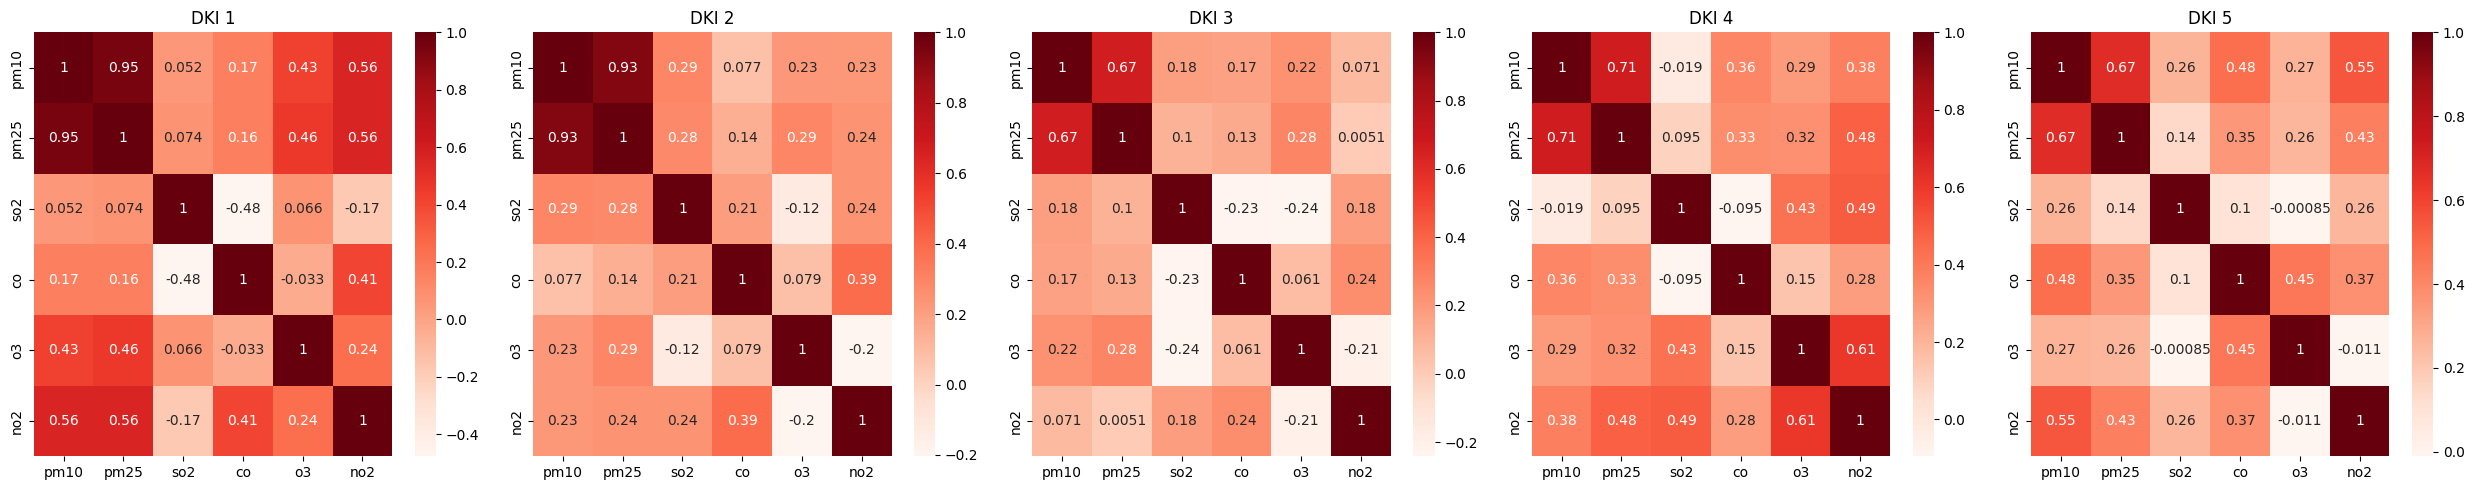

In [44]:
# Create subplots
dataframes = [df1, df2, df3, df4, df5]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))  # 5 columns, 1 row

# Plot heatmap for each DataFrame
for i, df in enumerate(dataframes):
    cor = df.corr(method='pearson')  # Compute correlation matrix
    sns.heatmap(cor, annot=True, cmap='Reds', ax=axes[i])  # Plot heatmap on the corresponding subplot
    axes[i].set_title(f'DKI {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout to fit all subplots nicely
plt.show()

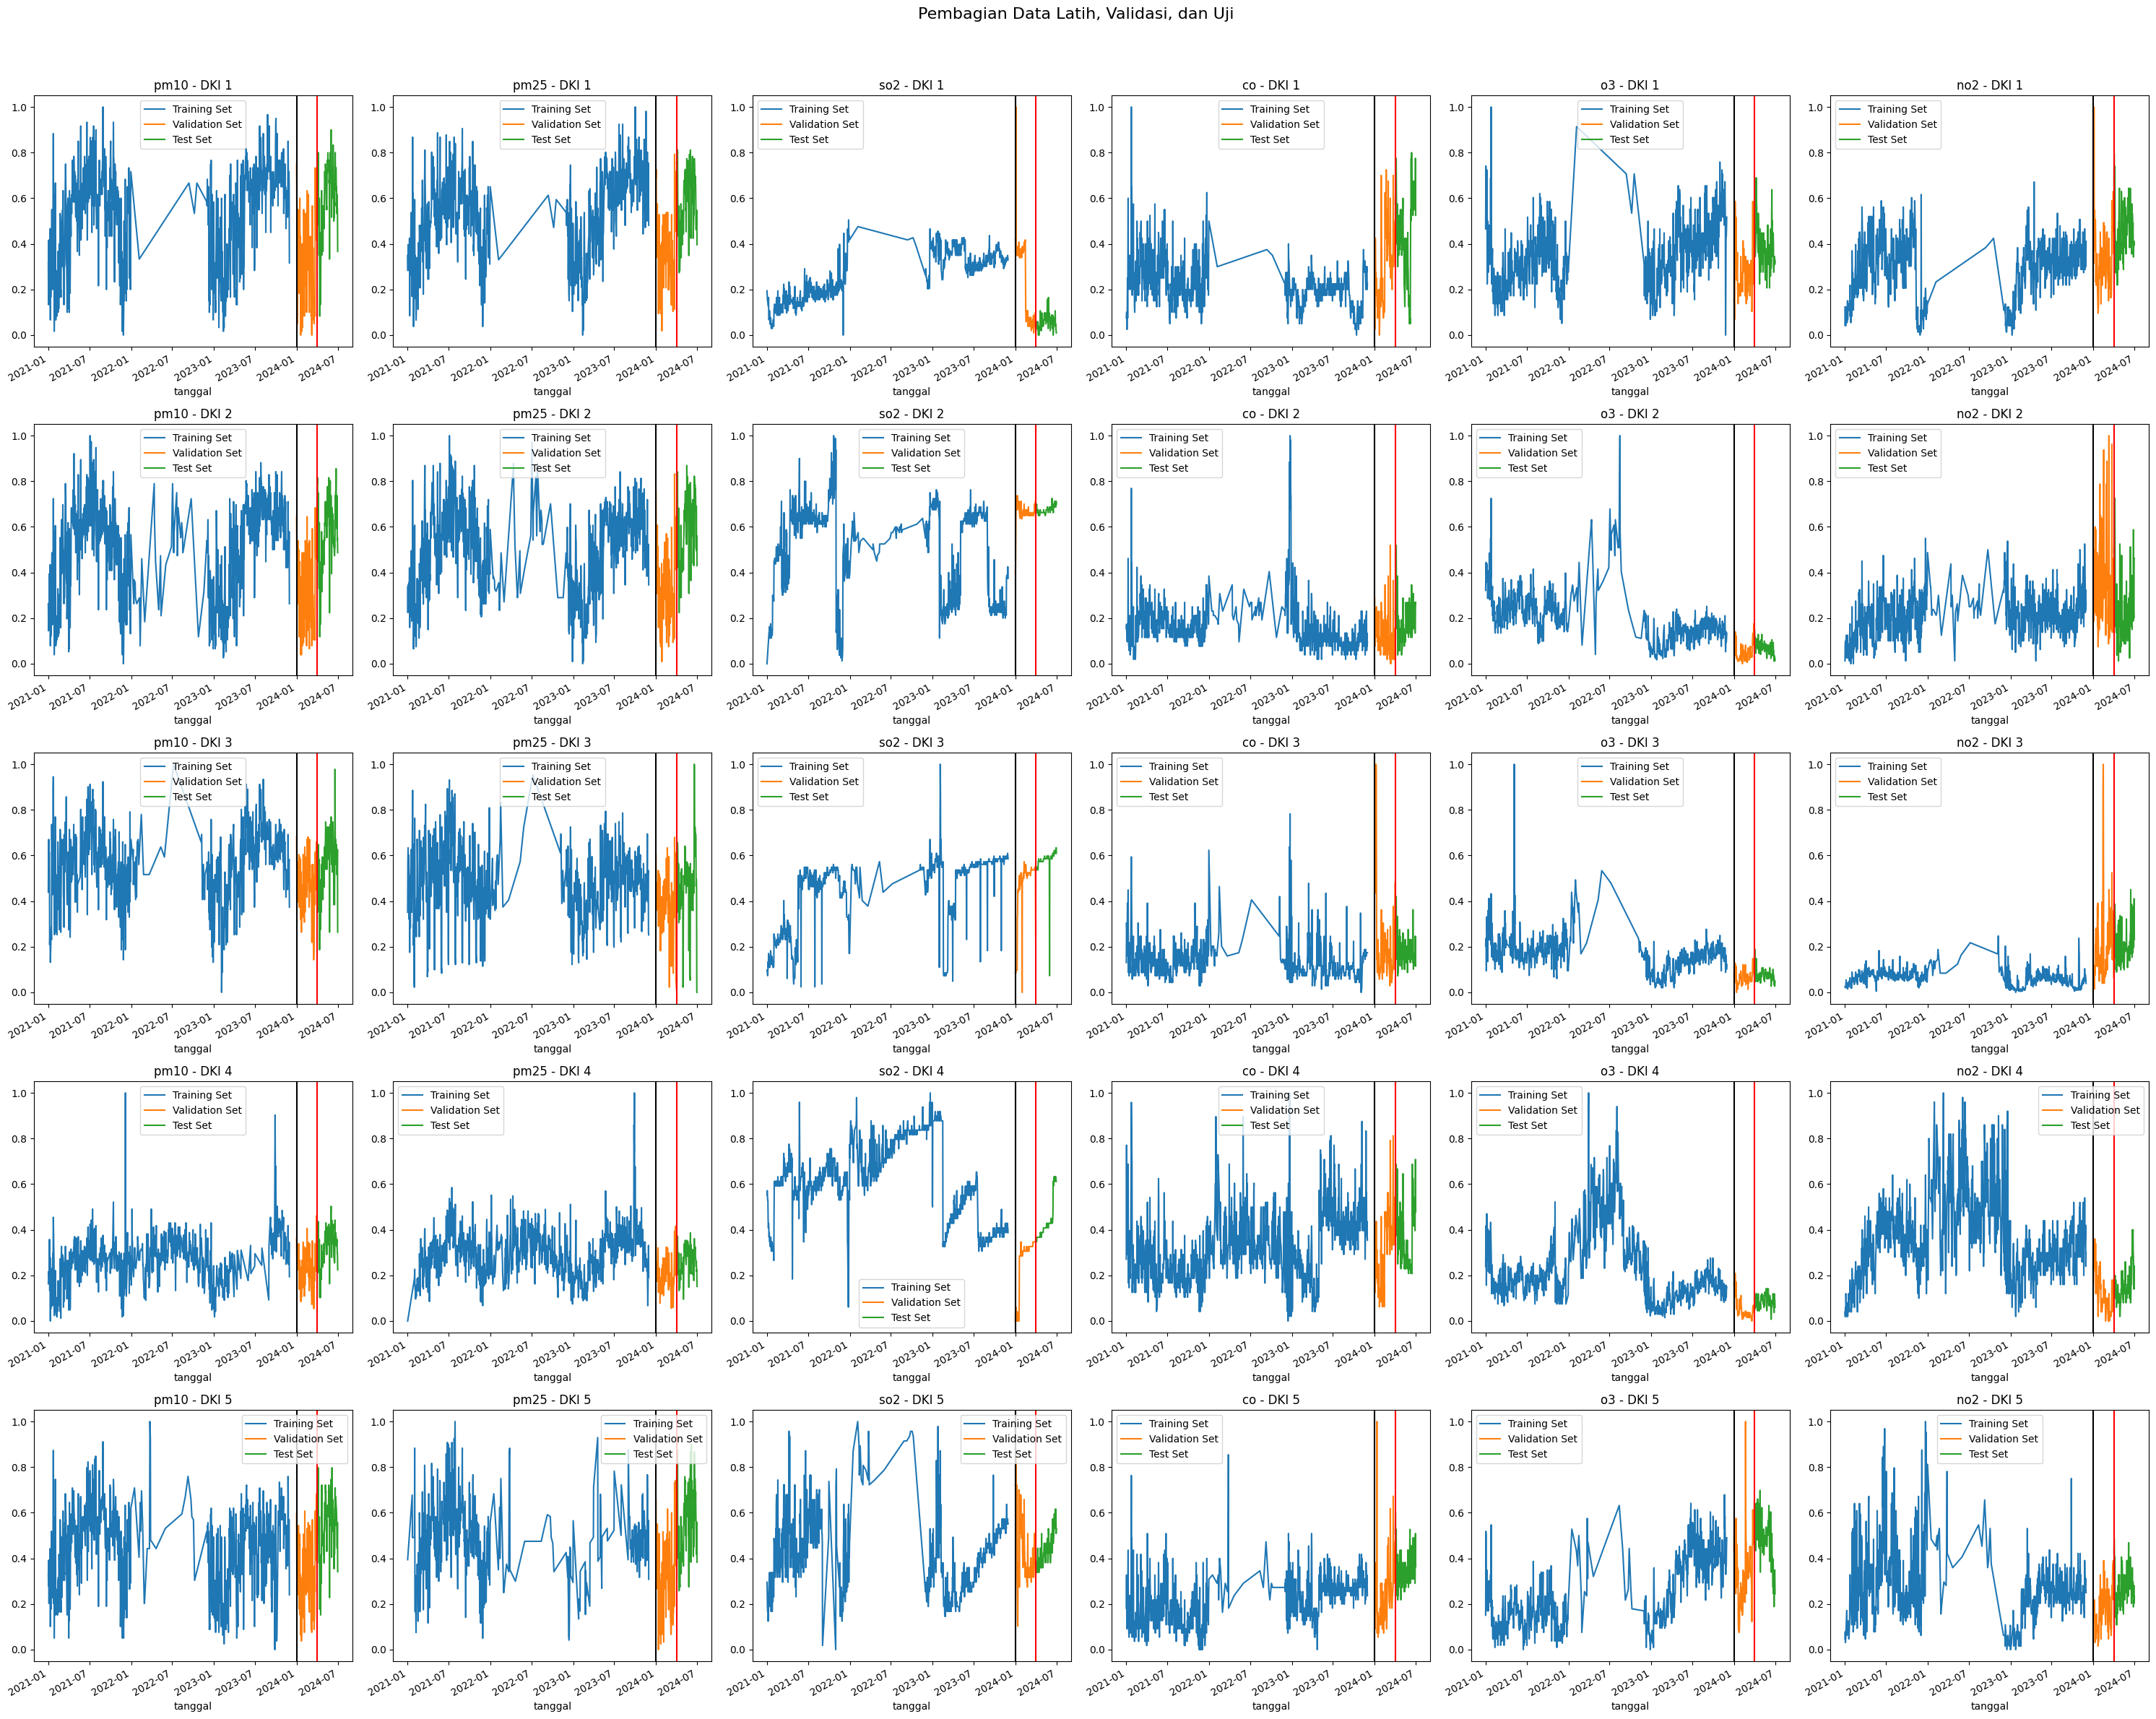

In [45]:
# Plotting the data
train_dfs = [train_dki1, train_dki2, train_dki3, train_dki4, train_dki5]
val_dfs = [val_dki1, val_dki2, val_dki3, val_dki4, val_dki5]
test_dfs = [test_dki1, test_dki2, test_dki3, test_dki4, test_dki5]

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30, 25))

for i in range(5):
    for j, var in enumerate(polutan_column):
        ax = axes[i, j]
        train_dfs[i] = train_dfs[i].sort_values('tanggal')
        val_dfs[i] = val_dfs[i].sort_values('tanggal')
        test_dfs[i] = test_dfs[i].sort_values('tanggal')
        train_dfs[i][var].plot(ax=ax, label='Training Set')
        val_dfs[i][var].plot(ax=ax, label='Validation Set')
        test_dfs[i][var].plot(ax=ax, label='Test Set')
        ax.axvline(split_date_train_test, color='black')
        ax.axvline(split_date_val_test, color='red')
        ax.set_title(f'{var} - DKI {i+1}')
        ax.legend(['Training Set', 'Validation Set', 'Test Set'])

plt.suptitle('Pembagian Data Latih, Validasi, dan Uji', y=0.95, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()